In [1]:
import cPickle as pickle
import matplotlib.pylab as pl
%matplotlib inline
import mxnet as mx
import numpy as np
import random
from data_utilities import load_mnist
import mx_layers as layers
import symbolic_gradient as sg

In [2]:
parameters, states = pickle.load(open('parameters/mnist-baseline-network', 'rb'))
training_X, training_Y, validation_X, validation_Y, test_X, test_Y = load_mnist(shape=(1, 28, 28))
# training_X, training_Y, validation_X, validation_Y, test_X, test_Y = load_mnist(path='shrinked_mnist', shape=(1, 28, 28))

In [3]:
# network = layers.variable('data')
# network = layers.convolution(X=network, n_filters=16, kernel_shape=(5, 5), stride=(1, 1), pad=(2, 2))
# network = layers.ReLU(network)
# network = layers.pooling(X=network, mode='maximum', kernel_shape=(2, 2), stride=(2, 2))
# network = layers.convolution(X=network, n_filters=16, kernel_shape=(5, 5), stride=(1, 1), pad=(2, 2))
# network = layers.ReLU(network)
# network = layers.pooling(X=network, mode='maximum', kernel_shape=(2, 2), stride=(2, 2))
# network = layers.flatten(network)
# network = layers.fully_connected(X=network, n_hidden_units=10)
# network = layers.softmax_loss(prediction=network, normalization='batch', id='softmax')
# try:
#     for symbol in network.get_internals(): print symbol.name
# except: pass

In [4]:
operations = (
    lambda network : layers.convolution(X=network, n_filters=16, kernel_shape=(5, 5), stride=(1, 1), pad=(2, 2)),
    lambda network : layers.ReLU(network),
    lambda network : layers.pooling(X=network, mode='maximum', kernel_shape=(2, 2), stride=(2, 2)),
    lambda network : layers.convolution(X=network, n_filters=16, kernel_shape=(5, 5), stride=(1, 1), pad=(2, 2)),
    lambda network : layers.ReLU(network),
    lambda network : layers.pooling(X=network, mode='maximum', kernel_shape=(2, 2), stride=(2, 2)),
    lambda network : layers.flatten(network),
    lambda network : layers.fully_connected(X=network, n_hidden_units=10),
    lambda network : layers.softmax_loss(prediction=network, normalization='batch', id='softmax'),
)

In [5]:
N_SAMPLES = 10
saliency_map = sg.symbolic_gradient(operations, 'pooling0', test_X[:N_SAMPLES], test_Y[:N_SAMPLES], parameters, states)

In [8]:
pre = lambda X : np.abs(X)
# integrate = lambda X : np.sum(X, axis=1)
integrate = lambda X : np.max(X, axis=1)
post = integrate(pre(saliency_map))
samples = np.reshape(test_X, (len(test_X), 28, 28))

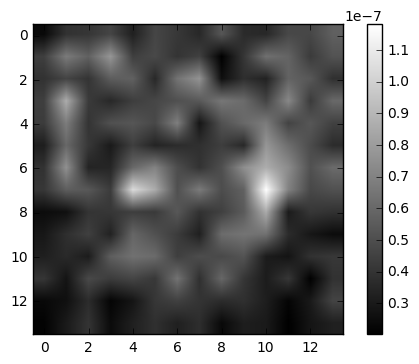

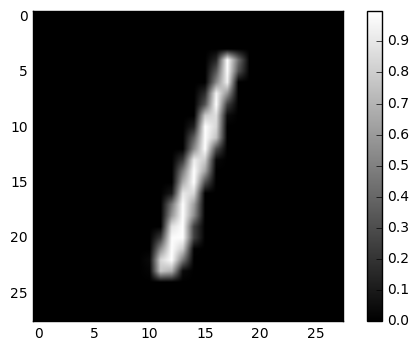

In [9]:
index = random.choice(range(N_SAMPLES))
pl.figure()
pl.imshow(post[index], cmap='gray')
pl.colorbar()
pl.figure()
pl.imshow(samples[index], cmap='gray')
pl.colorbar()